In [12]:
def pade(f, m, k):
    #functia pentru aproximarea Pade
    #parametri: f-functie de aproximat; m-ordinul primului polinom
    #k-ordinul celui de-al doilea polinom
    #output: functie care reprezinta aproximarea Pade
    c = [derivative(f, x, i)(x=0)/factorial(i) for i in range(m+k+1)]
    C = matrix.toeplitz([c[m+i] for i in range(k)], [c[m-i] if m-i > 0 else 0 for i in range(1,k)])
    R = vector([-c[i] for i in range(m+1, m+k+1)])
    B = C.solve_right(R)
    B_coeff = [1] + [elem for elem in B]
    if m > k:
        for i in range(k+1, m+1):
            B_coeff.append(0)
    B = vector(B_coeff)
    A = [sum([c[j-l]*B[l] for l in range(j+1)]) for j in range(m+1)]
    return sum([A[i]*x^i for i in range(m+1)])/sum([B[i]*x^i for i in range(k+1)])

In [24]:
R11(x) = pade(exp(x),1,1)
R22(x) = pade(exp(x),2,2)

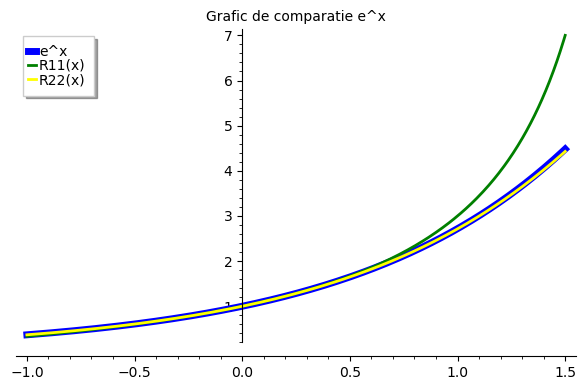

In [27]:
p1 = plot(exp(x), (x, -1, 1.5), thickness=5, title='Grafic de comparatie e^x', legend_label='e^x')
p2 = plot(R11(x), (x, -1, 1.5), thickness=2, color='green', legend_label = 'R11(x)')
p3 = plot(R22(x), (x, -1, 1.5), thickness=2, color='yellow', legend_label = 'R22(x)')
p1 + p2 + p3

In [22]:
L22(x) = pade(ln(1+x), 2, 2)
L31(x) = pade(ln(1+x), 3, 1)

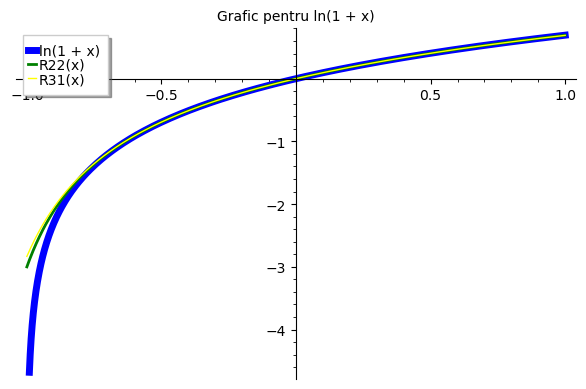

In [23]:
p1 = plot(ln(1 + x), (x, -1, 1), thickness=5, title='Grafic pentru ln(1 + x)', legend_label='ln(1 + x)')
p2 = plot(L22(x), (x, -1, 1), thickness=2, color='green', legend_label = 'R22(x)')
p3 = plot(L31(x), (x, -1, 1), thickness=1, color='yellow', legend_label = 'R31(x)')
p1 + p2 + p3